<div class='bar_title'></div>

*Decision Support Systems*

# Headline

student1, student2, student3, student,4 <br>

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

In [1]:
!pip install pulp
from pulp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv("../Data/pecanstreet2.csv", sep=';', decimal=",")
df = df.fillna(method='ffill')
df['consum'] = df['grid (93) (kw)'] + df['solar (93) (kw)']
df['solar'] = np.where(df['solar (93) (kw)'] < 0, 0, df['solar (93) (kw)'])
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('DateTime').groupby(pd.Grouper(freq='D')).sum()
df = df[['solar','consum']]

In [3]:
df.head()

,solar,consum
DateTime,,
2018-01-01,33.351,79.007
2018-01-02,12.853,78.090
2018-01-03,73.625,67.852
2018-01-04,63.614,49.206
2018-01-05,68.268,63.973


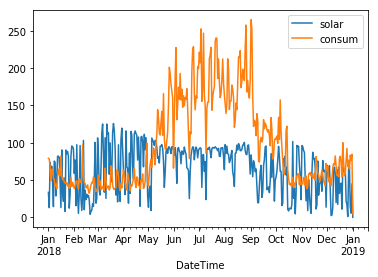

In [4]:
df.plot()
plt.show()

In [5]:
df=df.reset_index()
days = df.index.tolist()
consum = df.consum.to_dict()
solar_available = df.solar.to_dict()

## Modeling